<a href="https://colab.research.google.com/github/robmaz22/Kaggle-competitions/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project to predict chance to survival on the Titanic. 
##Competition [link](https://www.kaggle.com/c/titanic/data)

###1. Download dataset

In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

Saving kaggle.json to kaggle.json
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 15.8MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 53.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.98MB/s]


###2. Data analysis and visualisation

**Column names legend**

1. Pclass - Ticket class where:
  - 1 - 1st class
  - 2 - 2nd class
  - 3 - 3rd class
2. SibSp - number of siblings / spouses aboard the Titanic
3. Parch - number of parents / children aboard the Titanic
4. Embarked - Port of Embarkation where
  - C - Cherbourg
  - Q - Queenstown
  - S - Southampton




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train_df = pd.read_csv('train.csv')

In [ ]:
len(train_df)

891

In [ ]:
train_df.dro

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = train_df.groupby(by=['Pclass', 'Survived'])['PassengerId'].count()
df

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

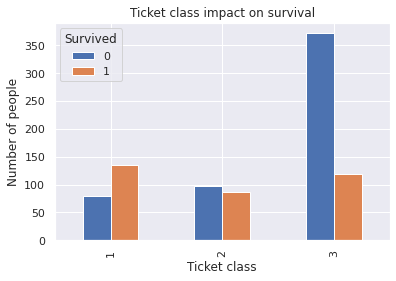

In [ ]:
df.unstack('Survived').plot(kind='bar',
                            title='Ticket class impact on survival',
                            xlabel='Ticket class',
                            ylabel='Number of people')

In [ ]:
df = train_df.groupby(by=['Survived', 'Sex'])['PassengerId'].count()
df

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

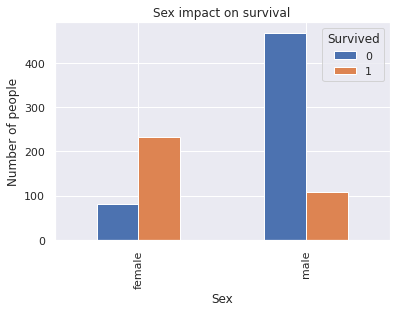

In [ ]:
df.unstack('Survived').plot(kind='bar',
                            title='Sex impact on survival',
                            xlabel='Sex',
                            ylabel='Number of people')

In [ ]:
df = train_df.groupby(by=['Survived', 'SibSp'])['PassengerId'].count()
df

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: PassengerId, dtype: int64

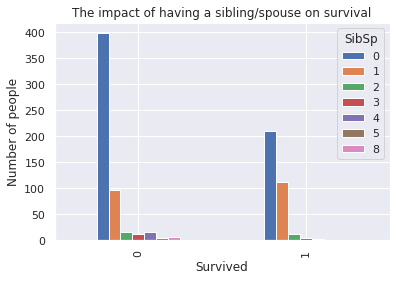

In [ ]:
df.unstack('SibSp').plot(kind='bar',
                            title='The impact of having a sibling/spouse on survival',
                            xlabel='Survived',
                            ylabel='Number of people')

In [ ]:
df = train_df.groupby(by=['Survived', 'Parch'])['PassengerId'].count()
df

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: PassengerId, dtype: int64

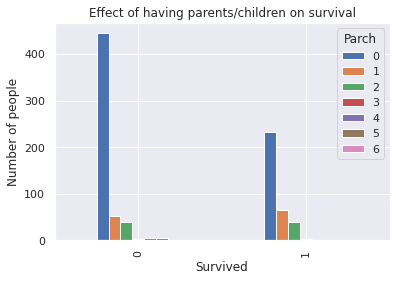

In [ ]:
df.unstack('Parch').plot(kind='bar',
                            title='Effect of having parents/children on survival',
                            xlabel='Survived',
                            ylabel='Number of people')

###3. Prepare for training

In [ ]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = train_df[features]
y = train_df['Survived']
len(X)

891

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(668, 4)
(223, 4)
(668,)
(223,)


In [ ]:
X_train = pd.get_dummies(X_train) 
X_val = pd.get_dummies(X_val) 

###4. Training and evaluate models

* Checking best model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = {'Decision Tree' : DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression(),
          'KNeighborsClassifier()': KNeighborsClassifier(),
          'SVC': SVC()}
models_score = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  models_score[name] = model.score(X_val, y_val)

models_score

{'Decision Tree': 0.7892376681614349,
 'KNeighborsClassifier()': 0.7668161434977578,
 'Logistic Regression': 0.8026905829596412,
 'SVC': 0.820627802690583}

* Params tuning for best model

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'tol' : [1e-4, 2e-4, 3e-4, 4e-4],
          'C' : [0.1, 1.0, 5.0, 10.0, 100.0],
          'class_weight' : ['none', 'balanced'],
          'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'l1_ratio' : [0.0, 0.1, 0.5, 1.0]}
    

grid = GridSearchCV(LogisticRegression(),
                    params,
                    n_jobs=-1,
                    verbose=3)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 8138 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 15306 tasks      | elapsed:  1.2min


LogisticRegression(C=0.1, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.0, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:  1.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


* Evaluate tunned model

In [ ]:
best_model = LogisticRegression(C=0.1,
                                penalty='l2',
                                solver='newton-cg')

best_model.fit(X_train, y_train)
print(f'Model accuracy: {best_model.score(X_val, y_val):.3f}%')

Model accuracy: 0.803%


###5. Predict test samples

In [ ]:
test_df = pd.read_csv('test.csv')
X_test = test_df[features]
X_test = pd.get_dummies(X_test)

predictions = best_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
